# Perform Exploratory Data Analysis

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [57]:
df = pd.read_csv('kc_house_data.csv')

In [58]:
df.head().T

,0,1,2,3,4
id,7129300520,6414100192,5631500400,2487200875,1954400510
date,10/13/2014,12/9/2014,2/25/2015,12/9/2014,2/18/2015
price,221900,538000,180000,604000,510000
bedrooms,3,3,2,4,3
bathrooms,1,2.25,1,3,2
sqft_living,1180,2570,770,1960,1680
sqft_lot,5650,7242,10000,5000,8080
floors,1,2,1,1,1
waterfront,NaN,0,0,0,0
view,0,0,0,0,0


In [59]:
len(df)

21597

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [61]:
df[df['sqft_basement'] == '?'] = np.nan
df['sqft_basement'] = df['sqft_basement'].map(float)

In [62]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7.129301e+09,10/13/2014,221900.0,3.0,1.00,1180.0,5650.0,1.0,NaN,0.0,...,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,6.414100e+09,12/9/2014,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,...,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,5.631500e+09,2/25/2015,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,...,6.0,770.0,0.0,1933.0,NaN,98028.0,47.7379,-122.233,2720.0,8062.0
3,2.487201e+09,12/9/2014,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,...,7.0,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,1.954401e+09,2/18/2015,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,...,8.0,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0


In [63]:
df.isna().sum()

id                454
date              454
price             454
bedrooms          454
bathrooms         454
sqft_living       454
sqft_lot          454
floors            454
waterfront       2793
view              515
condition         454
grade             454
sqft_above        454
sqft_basement     454
yr_built          454
yr_renovated     4208
zipcode           454
lat               454
long              454
sqft_living15     454
sqft_lot15        454
dtype: int64

In [64]:
df = df.dropna(subset=['id'])

In [65]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2339
view               61
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3754
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

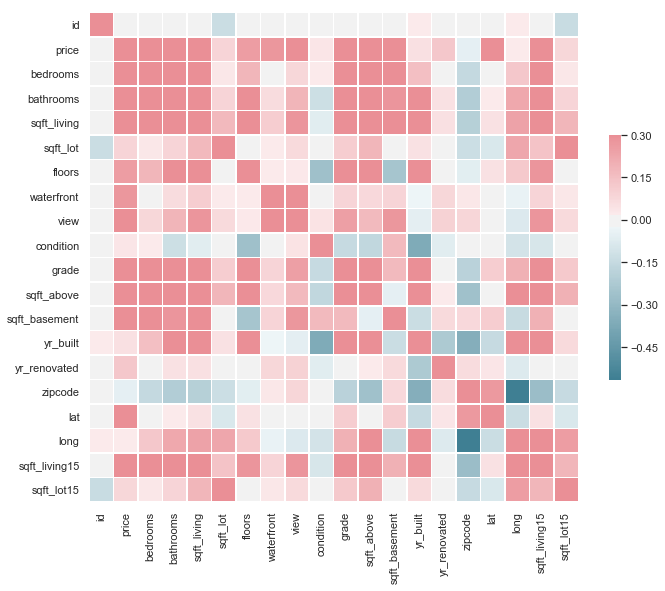

In [66]:
import seaborn as sns

sns.set(style='white')
corr = df.corr()
mask = np.zeros_like(corr,dtype=np.bool)

fig, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(220,10,as_cmap=True)

sns.heatmap(corr,mask=mask,cmap=cmap,vmax=.3,center=0,square=True,linewidth=.5,cbar_kws={'shrink':.5})

In [67]:
df = df.drop(['long'], axis = 1)   #long/lat highly correlated with zip, remove
df = df.drop(['lat'], axis = 1)
df.head().T

,0,1,2,3,4
id,7.1293e+09,6.4141e+09,5.6315e+09,2.4872e+09,1.9544e+09
date,10/13/2014,12/9/2014,2/25/2015,12/9/2014,2/18/2015
price,221900,538000,180000,604000,510000
bedrooms,3,3,2,4,3
bathrooms,1,2.25,1,3,2
sqft_living,1180,2570,770,1960,1680
sqft_lot,5650,7242,10000,5000,8080
floors,1,2,1,1,1
waterfront,NaN,0,0,0,0
view,0,0,0,0,0


Normalizing the Data

In [68]:
# may want to address nulls prior
# may want to create one hot encoding for possible categorical columns

df_norm = df
for i in df.columns:
    if i == 'date' or i == 'price':
        pass
    else:
        df_norm[i] = (df_norm[i] - df_norm[i].mean())/df_norm[i].std()

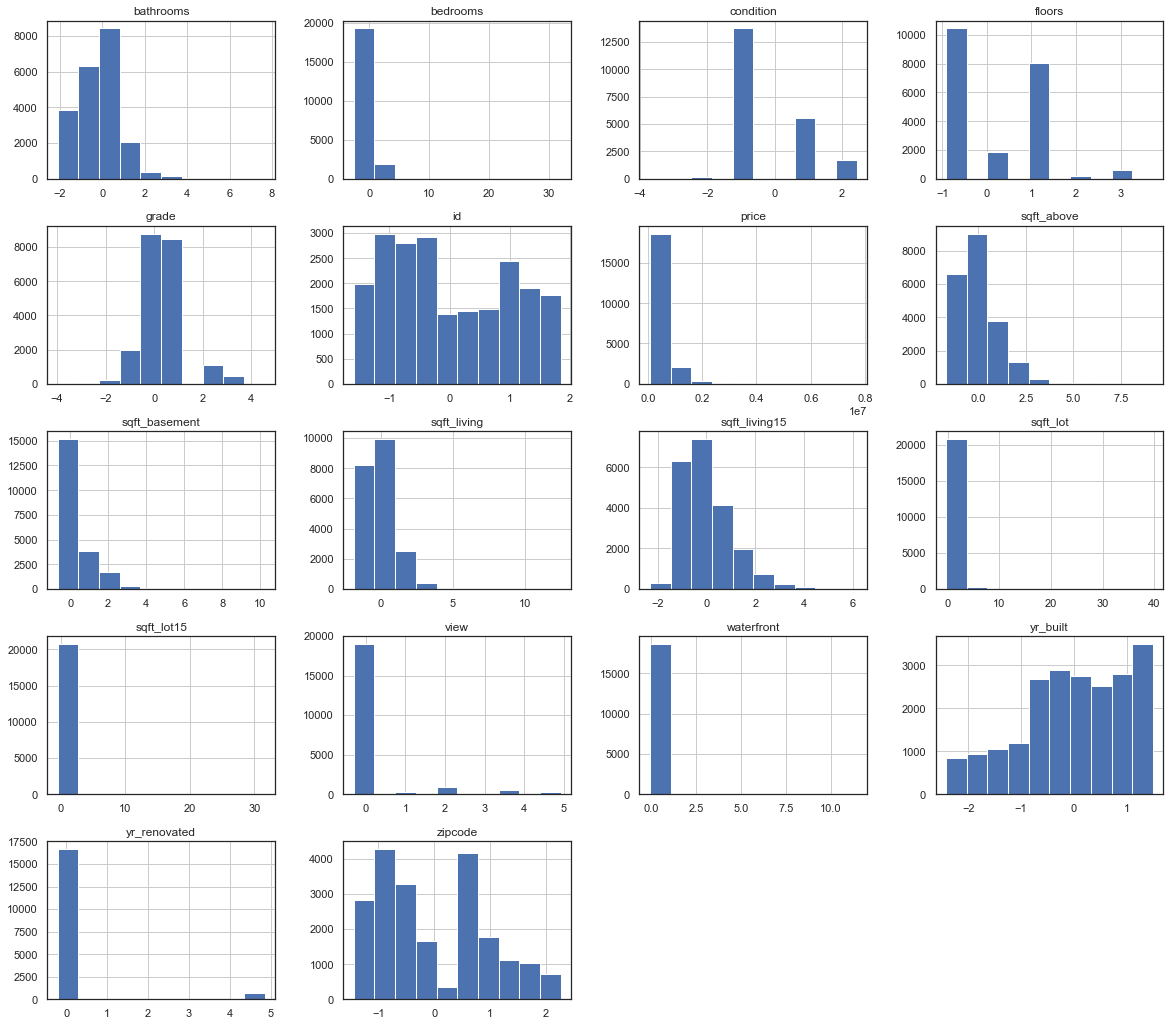

In [69]:
df_norm.hist(figsize = (20, 18));
# checking normalization of data

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


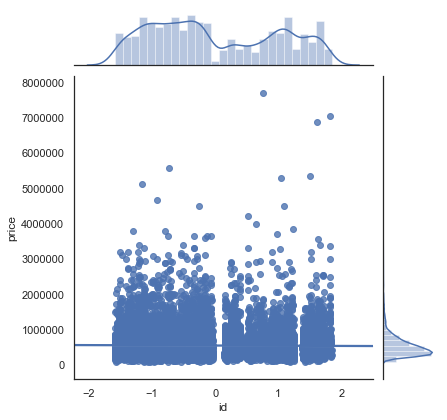

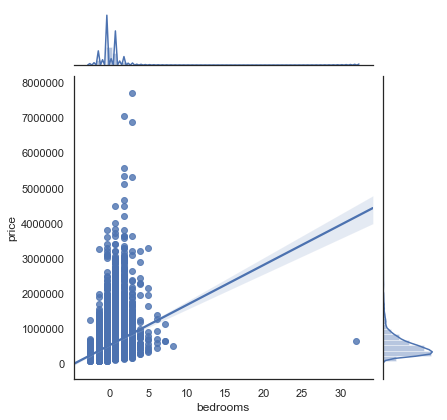

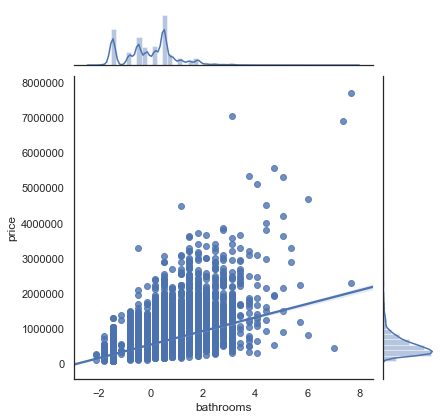

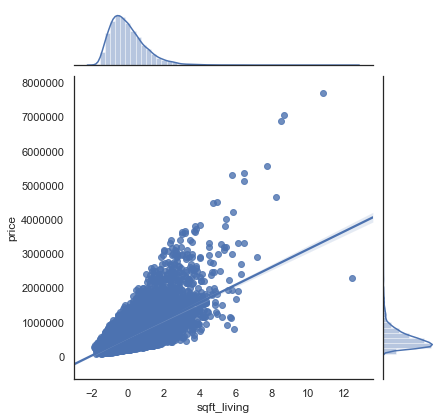

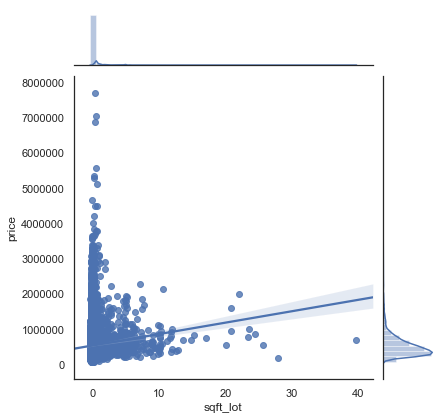

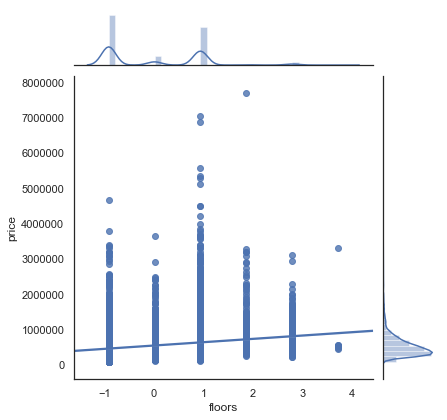

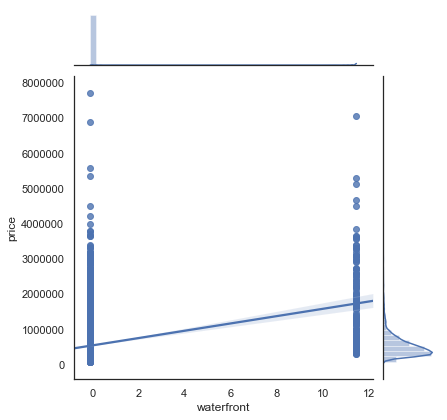

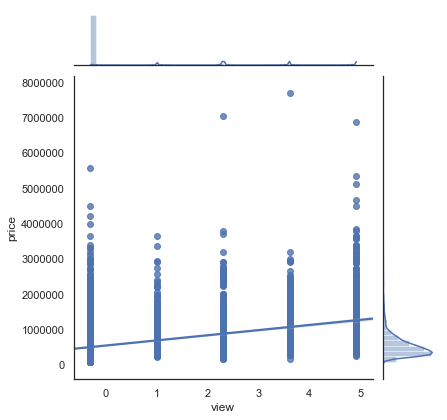

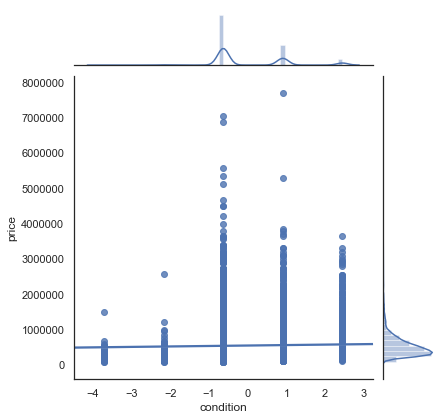

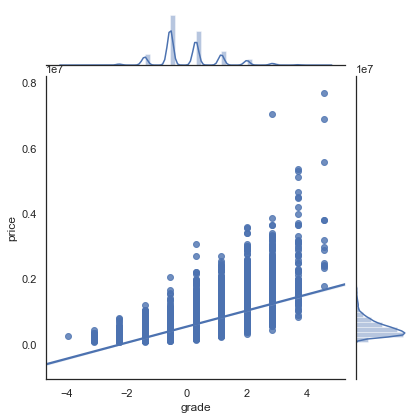

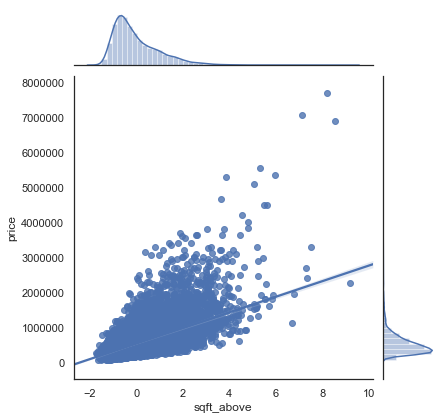

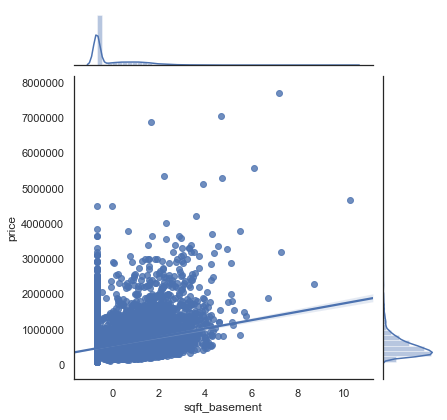

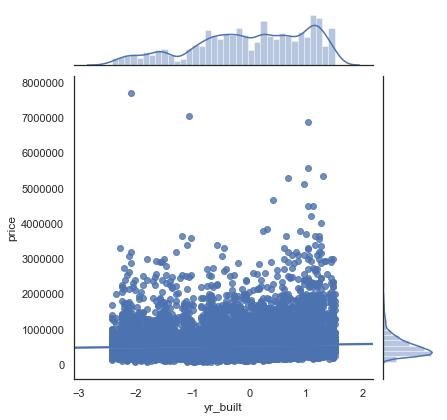

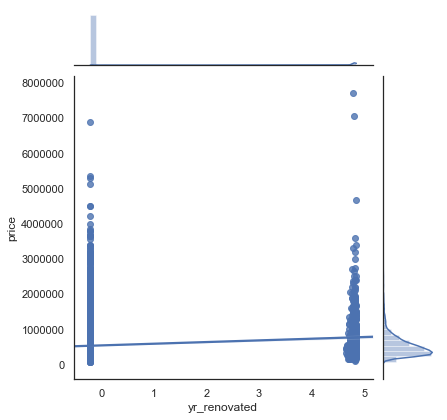

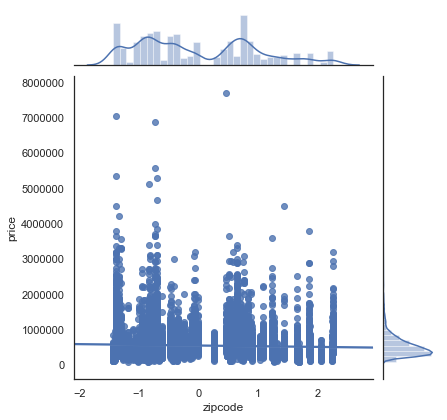

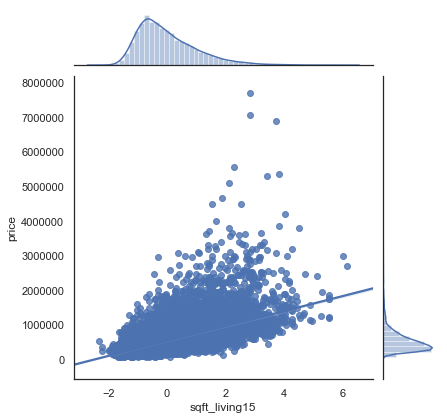

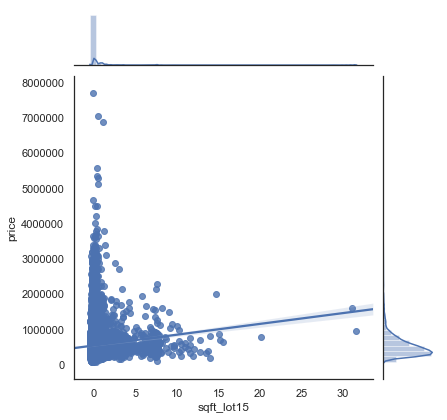

In [70]:
for i in df_norm.columns:
    if i == 'price' or i == 'date':
        pass
    else:
        sns.jointplot(x=df_norm[i], y=df_norm['price'], data=df_norm, kind='reg')
        plt.show()

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
model = LinearRegression()

In [72]:
X = df_norm[['sqft_living', 'sqft_above', 'sqft_living15']]
y = df_norm['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)
model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [73]:
y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)

In [74]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [75]:
from sklearn.metrics import mean_squared_error

In [76]:
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print(train_mse)
print(test_mse)

67418314453.94892
67639475167.47278


In [77]:
train_error = []
test_error = []
mean_train_error = []
mean_test_error = []

In [78]:
test_sizes = list(range(5,95,10))

In [ ]:
for i in test_sizes:
    for n in range(0,100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i/100)
        model.fit(X_train, y_train)
        y_hat_train = model.predict(X_train)
        y_hat_test = model.predict(X_test)
        train_error.append(mean_squared_error(y_train, y_hat_train))
        test_error.append(mean_squared_error(y_test, y_hat_test))
    mean_train_error.append(np.mean(train_error))
    mean_test_error.append(np.mean(test_error))
plt.scatter(test_sizes, mean_train_error, label = 'Training Error')
plt.scatter(test_sizes, mean_test_error, label = 'Testing Error')
plt.legend()

TypeError: expected 1D vector for x

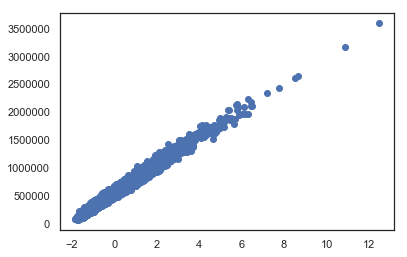

In [116]:
from numpy.polynomial.polynomial import polyfit

sqft_above, sqft_living, sqft_living15 = np.split(X_test,3,axis=1)

ls_vars = [sqft_above,sqft_living,sqft_living15]

for var in ls_vars:
    plt.scatter(x=var,y=y_hat_test)
    b,m = polyfit(var,y_hat_test,1)
    plt.plot(var,b+m * var,'-')
    plt.show()
    

In [84]:
import statsmodels.formula.api as smf

In [85]:
col_names = X
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p_value']]

In [91]:
for idx, val in enumerate(col_names):
    print('Housing Price ~ ' + val)
    print('----------------------------')
    formula = 'price~' + val
    model = smf.ols(formula=formula, data=df_norm).fit()
    x_new = pd.DataFrame({val:[df_norm[val].min(), df_norm[val].max()]})
    predictions = model.predict(x_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1]])
    print(results[idx+1])
    print(predictions)

Housing Price ~ sqft_living
----------------------------
['sqft_living', 0.49326420216689215, 540510.7274275173, 258509.31443255467, 0.0]
0    5.900170e+04
1    3.765470e+06
dtype: float64
Housing Price ~ sqft_above
----------------------------
['sqft_above', 0.36619760286513126, 540510.7274275173, 222737.91256067465, 0.0]
0    1.589599e+05
1    2.589582e+06
dtype: float64
Housing Price ~ sqft_living15
----------------------------
['sqft_living15', 0.3438828169564686, 540510.7274275173, 215844.82195735566, 0.0]
0    4.053262e+04
1    1.869800e+06
dtype: float64
